## Principal Component Analysis - Congress Dataset

In [ ]:
import pandas as pd
import numpy as np
from fcmeans import FCM
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import adjusted_rand_score
import warnings

In [ ]:
df = pd.read_csv(r"/content/Congress Dataset.csv")
df

,name,party,state,vote1,vote2,vote3,vote4,vote5,vote6,vote7,vote8,vote9,vote10,vote11,vote12,vote13,vote14,vote15
0,Alexander,R,TN,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,Ayotte,R,NH,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,Baldwin,D,WI,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
3,Barrasso,R,WY,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,Bennet,D,CO,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Warner,D,VA,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
96,Warren,D,MA,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
97,Whitehouse,D,RI,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
98,Wicker,R,MS,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
columns_to_drop=["name","party","state"]
X = df.drop(columns_to_drop,axis=1)
X

,vote1,vote2,vote3,vote4,vote5,vote6,vote7,vote8,vote9,vote10,vote11,vote12,vote13,vote14,vote15
0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
3,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
96,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
97,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
98,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
X.shape

(100, 15)

In [ ]:
y = df["party"]
y = y.replace("D", 0)
y = y.replace("R", 1)
y = y.replace("I",1)
y

0     1
1     1
2     0
3     1
4     0
     ..
95    0
96    0
97    0
98    1
99    0
Name: party, Length: 100, dtype: int64

### First Calc COV Matrix to Calc Eigens

In [ ]:
def calculate_covariance_matrix(X):
    n = X.shape[0] # Number of samples
    X_std = X - np.mean(X.T, axis=1) # Standardize the data by subtracting the column means

    covariance_matrix = np.dot(X_std.T, X_std) / (n) # Calculate the covariance matrix

    return covariance_matrix

In [ ]:
cov_matrix=calculate_covariance_matrix(X)

In [ ]:
cov_matrix.shape

(15, 15)

In [ ]:
len(cov_matrix)

15

### Using power iteration method to calc Eigens from scratch...

In [ ]:
def power_iteration(A, num_iterations):
    n = len(A)
    eigenvectors = []
    eigenvalues = []
    #This will run 15 times
    for _ in range(n):
        # Create a random initial vector
        x = np.random.rand(n)
        for _ in range(num_iterations):
            # Multiply matrix A with vector x
            y = np.dot(A, x)
            # Normalize the resulting vector
            x = y / np.linalg.norm(y)

        # Compute the eigenvalue corresponding to x
        eigenvalue = np.dot(np.dot(A, x), x)
        eigenvalues.append(eigenvalue)
        # Append the eigenvector to the list
        eigenvectors.append(x)

        # Remove the dominant eigenvector and value from A
        A -= eigenvalue * np.outer(x, x)

    return eigenvalues, eigenvectors


In [ ]:
eigenvalues,eigenvectors=power_iteration(cov_matrix,100)
eigenvalues=np.array(eigenvalues)
eigenvectors=np.array(eigenvectors)

In [ ]:
cov_matrix.shape

(15, 15)

In [ ]:
eigenvalues

array([2.70097367e+00, 1.38037219e-01, 7.69231241e-02, 5.41697285e-02,
       4.80262075e-02, 3.60209974e-02, 2.74118642e-02, 2.34122838e-02,
       1.35734193e-02, 1.25000290e-02, 1.21160445e-02, 1.03877276e-02,
       7.32432075e-03, 5.73626237e-03, 1.63727237e-03])

In [ ]:
eigenvalues.shape

(15,)

In [ ]:
eigenvectors

array([[-2.27871096e-01,  2.87640181e-01,  2.87235997e-01,
        -2.83231364e-02,  2.92017712e-01, -2.79390639e-01,
         2.82533716e-01, -5.48950124e-03,  2.87542893e-01,
         2.80215551e-01, -2.71072295e-01, -2.89145249e-01,
         2.82183022e-01, -2.72489630e-01, -2.58220006e-01],
       [ 5.37698423e-01,  2.97515396e-03,  1.56648974e-01,
        -2.86329545e-02,  1.50682974e-01,  3.08626227e-01,
         1.58582061e-01, -1.29661897e-02,  2.37825096e-01,
         1.84420510e-01,  3.69438669e-01, -2.72209548e-01,
         2.60750720e-01, -2.99491906e-02,  4.14967887e-01],
       [ 4.03110574e-03,  1.17729152e-01,  4.04094929e-01,
         1.04924439e-01,  3.48898438e-01,  4.07412878e-02,
        -3.70316483e-01,  8.04723762e-03, -1.10371506e-01,
         4.03691217e-01, -1.50356813e-02,  1.09932027e-02,
        -2.77580916e-01,  5.44370906e-01, -4.84404943e-02],
       [-7.16209927e-01, -1.65264817e-01, -8.94169327e-03,
         7.27137415e-02, -5.10687672e-03,  3.30670186

In [ ]:
eigenvectors.shape

(15, 15)

In [ ]:
def pca(X,eigenvalues,eigenvectors, n_components):

    mean=np.array(np.mean(X.T, axis=1))
    X_std = X - mean

    # Sort the eigenvalues in descending order
    eig_indices = np.argsort(eigenvalues)[::-1] # sort from descending
    sorted_eigenvalues = eigenvalues[eig_indices]
    sorted_eigenvectors = eigenvectors[:, eig_indices]

    # Select the top 'n_components' eigenvectors
    eigenvectors_subset = sorted_eigenvectors[:, :n_components]

    # Project the data onto the selected eigenvectors
    compressed_data  = np.dot(X_std, eigenvectors_subset)


    reconstructed_data=np.dot(compressed_data, eigenvectors_subset.transpose())+mean

    return compressed_data,reconstructed_data

### Select Num_components -> 2

In [ ]:
num_components=2
compressed_data,reconstructed_data=pca(X,eigenvalues,eigenvectors,num_components)
print(f"Shape of data : {X.shape}")
print(f"Afrer applying PCA : {compressed_data.shape}")
# Reconstruction error
Reconstruction_error=np.mean(np.square(np.array(X) - reconstructed_data))
print(f"Reconstruction error : {Reconstruction_error}")

Shape of data : (100, 15)
Afrer applying PCA : (100, 2)
Reconstruction error : 0.18938119266984352


### Select Num_components -> 3

In [ ]:
num_components=3
compressed_data,reconstructed_data=pca(X,eigenvalues,eigenvectors,num_components)
print(f"Shape of data : {X.shape}")
print(f"Afrer applying PCA : {compressed_data.shape}")
# Reconstruction error
Reconstruction_error=np.mean(np.square(np.array(X) - reconstructed_data))
print(f"Reconstruction error : {Reconstruction_error}")

Shape of data : (100, 15)
Afrer applying PCA : (100, 3)
Reconstruction error : 0.16270667540698192


### Select Num_components -> 5

In [ ]:
num_components=5
compressed_data,reconstructed_data=pca(X,eigenvalues,eigenvectors,num_components)
print(f"Shape of data : {X.shape}")
print(f"Afrer applying PCA : {compressed_data.shape}")
# Reconstruction error
Reconstruction_error=np.mean(np.square(np.array(X) - reconstructed_data))
print(f"Reconstruction error : {Reconstruction_error}")

Shape of data : (100, 15)
Afrer applying PCA : (100, 5)
Reconstruction error : 0.12233787574833128


### Select Num_components -> 8

In [ ]:
num_components=8
compressed_data,reconstructed_data=pca(X,eigenvalues,eigenvectors,num_components)
print(f"Shape of data : {X.shape}")
print(f"Afrer applying PCA : {compressed_data.shape}")
# Reconstruction error
Reconstruction_error=np.mean(np.square(np.array(X) - reconstructed_data))
print(f"Reconstruction error : {Reconstruction_error}")

Shape of data : (100, 15)
Afrer applying PCA : (100, 8)
Reconstruction error : 0.0960434916136997


### Notice Error decrease in larger Num_components.....

### Fuzzy_CMean Model :

In [ ]:
k=2
g=2

# initialize membership matrix and normalize to make sum=1 in each row.
matrix=np.random.rand(X.shape[0],k)
matrix/=np.sum(matrix, axis=1)[:,np.newaxis]

In [ ]:
matrix.shape

(100, 2)

In [ ]:
# CCjk =(∑i=1:N Mij^g * xik) / ∑i=1:N Mij^g
# c12 -> 1 for matrix, 2 for data
def compute_centroids(X,k,matrix,g):
    centroids=np.zeros((k,X.shape[1])) # 2*15
    for i in range (k):
        centroids[i,:]= np.sum((matrix[:,i]**g)[:,np.newaxis]*X,axis=0) / np.sum((matrix[:,i]**g))
    return centroids

In [ ]:
def update_membership_matrix(X,centroids,k,g):
    distance=np.zeros((X.shape[0],k)) # 100*2
    for i in range (k):
        distance[:,i]=np.linalg.norm(X-centroids[i,:],axis=1)
    U_new=1/ (distance ** (2/(g-1)) * np.sum((1/distance) ** (2/(g-1)) , axis=1 )[:,np.newaxis] )
    return U_new

In [ ]:
def compute_labels(X,k,matrix,g,max_iteration):
    for iteration in range (max_iteration):
        Centroids=compute_centroids(X, k, matrix , g)
        U_new= update_membership_matrix (X,Centroids, k , g )

        # if no update in matrix
        if np.linalg.norm (U_new- matrix)<=0.00001:
            break
        matrix=U_new

    labels=np.argmax(U_new, axis=1)
    return labels

In [ ]:
labels=compute_labels(X,k,matrix,g,1000)
labels

array([0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1])

In [ ]:
from sklearn.metrics import adjusted_rand_score

# Compute the adjusted Rand index
ari = float(adjusted_rand_score(y, labels))

# Print the result
print(f"Adjusted Rand Index: {ari}")


Adjusted Rand Index: 0.844845420066659


#### using all the features and without applying PCA , the ARI is 0.84

### Apply PCA

In [ ]:
num_components=3
compressed_data,reconstructed_data=pca(X,eigenvalues,eigenvectors,num_components)
compressed_data.shape

(100, 3)

In [ ]:
labels3=compute_labels(compressed_data,k,matrix,g,1000)

In [ ]:
labels3

array([0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1])

In [ ]:
y=np.array(y)
y

array([1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0])

In [ ]:
compressed_data.shape

(100, 3)

#### using only 3 features of the data by applying PCA we were able to retain most of the data and also compress the data ,achieving 0.73 ARI, we saved alot of memory

In [ ]:
ari = float(adjusted_rand_score(y, labels3))

# Print the result
print(f"Adjusted Rand Index: {ari}")


Adjusted Rand Index: 0.7369696969696969


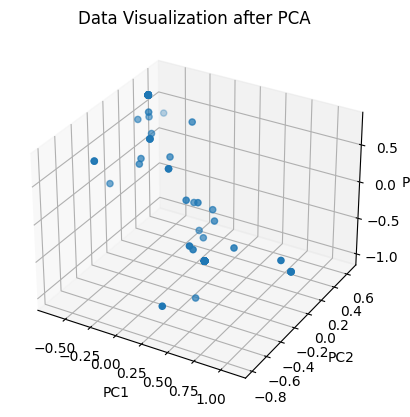

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(compressed_data[:, 0], compressed_data[:, 1], compressed_data[:, 2])

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Data Visualization after PCA')

plt.show()

#### Dimensionality Reduction of the PCA helps us to visulaize the data and improve Interpretability and also compresses the data.
#### Dataset shape was (100,15) then it was reduced to (100,3) Also the labels were approximately the same as the original data.